In [114]:
import random
import math
import matplotlib.pyplot as plt

def geraRect(num, intervalo):
	pontos = []
	for _ in range(num):

		# Gera um ponto aleatório dentro do intervalo
		x = random.randint(intervalo[0], intervalo[1])
		y = random.randint(intervalo[0], intervalo[1])

		pontos.append((x,y))
	return pontos

def geraCirc(num, intervalo=(50,100)):
	pontos = []

	# pega o menor valor do intervalo para usar como raio
	raio_maximo = min(intervalo)

	for _ in range(num):

		# Gera um ângulo aleatório entre 0 e 2*pi (360 graus)
		angulo = random.uniform(0, 2 * math.pi)
		
		# Gera um raio aleatório entre 0 e o raio máximo
		raio = random.uniform(0, raio_maximo)
		
		# Converte coordenadas polares em coordenadas cartesianas centradas no meio do intervalo
		x = raio * math.cos(angulo) + 1.5*intervalo[0]
		y = raio * math.sin(angulo) + 1.5*intervalo[0]
		
		pontos.append((x, y))

	return pontos


def gera_pontos(num=200, intervalo=(50,100)):
	pontos = []
	
	aleatorio = random.randint(0,1)

	if aleatorio == 0:
		pontos = geraRect(num, intervalo)
	else:
		pontos = geraCirc(num, intervalo)

	return pontos

def plota_pontos(pontos, intervalo=(50,100)):
	plt.scatter(*zip(*pontos), s=5, c='black')
	plt.show()

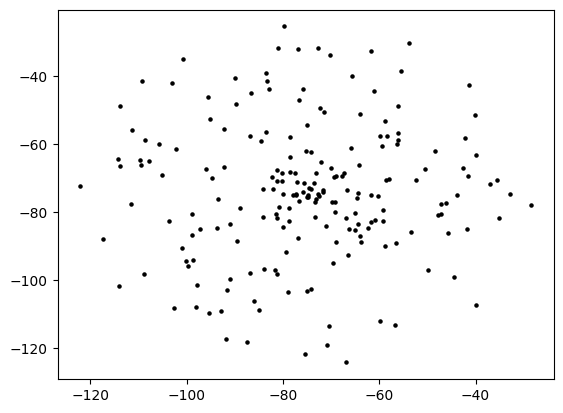

In [115]:
plota_pontos(gera_pontos(200, (-50,0)), (-50,0))

In [116]:
# funções auxiliares

def compara_polares(ancora, ponto):
	# compara o angulo polar de um ancora com um ponto
	# retorna o angulo entre eles
	dx = ponto[0] - ancora[0]
	dy = ponto[1] - ancora[1]
	angulo = math.atan2(dy, dx)
	return angulo

def orientacao(p, q, r):
	# para encontrar a orientação do triângulo formado por p, q, r.
	# A função retorna os seguintes valores
	# 0 --> p, q e r são colineares (será considerado à direita)
	# 1 --> Sentido horário
	# 2 --> Sentido anti-horário

	val = (q[1] - p[1]) * (r[0] - q[0]) - \
		  (q[0] - p[0]) * (r[1] - q[1])

	if val >= 0:
		return 1  # sentido horário
	else:
		return 2  # sentido anti-horário
	
def compara_distancias(ancora, ponto):
    # Compare a distância dos pontos ao ponto âncora
    dist_ancora_ponto = (ponto[0] - ancora[0])**2 + (ponto[1] - ancora[1])**2
    return dist_ancora_ponto

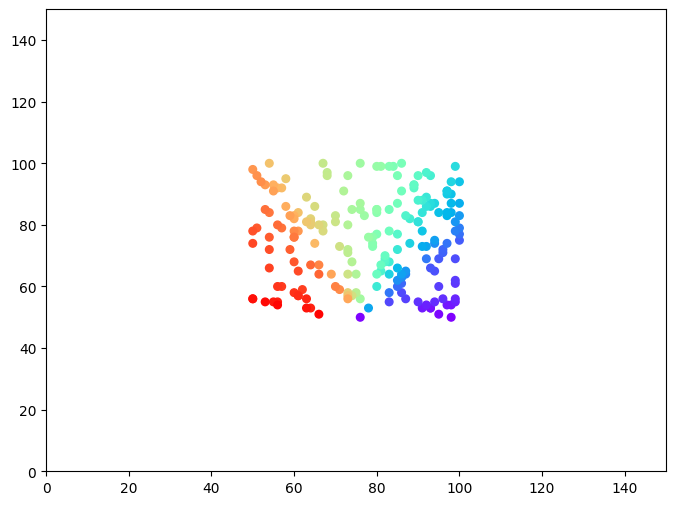

In [117]:
def plota_arcoiris(pontos):
    # Gera uma lista de cores seguindo as cores do arco íris
    num_pontos = len(pontos)
    colors = [plt.cm.rainbow(i / num_pontos) for i in range(num_pontos)]

    # Extrai coordenadas x and y
    x, y = zip(*pontos)

    # Cria um scatter plot com as cores baseadas no ângulo
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=colors, s=30)
	 
    plt.xlim(0, 1.5*max(x))
    plt.ylim(0, 1.5*max(y))
    plt.show()

p = gera_pontos(200, (50,100))
ancora = min(p, key=lambda p: (p[1], p[0]))
p.sort(key=lambda ponto: compara_polares(ancora, ponto))

plota_arcoiris(p)

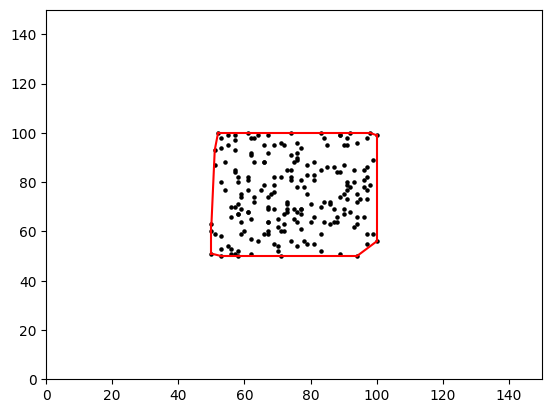

In [118]:
def envoltoria_convexa(pontos):
	"""
	Calcula a envoltória convexa de uma lista de pontos.
	:param pontos: Lista de pontos
	:return: Lista de pontos que formam a envoltória convexa
	"""

	# Se houver menos de 3 pontos, não há envoltória convexa
	if len(pontos) <= 3:
		return None
	
	# Encontre o ponto âncora com a menor coordenada y (e menor x se houver empate)
	ponto_ancora = min(pontos, key=lambda p: (p[1], p[0]))

	# Ordena os pontos por ângulo polar em relação ao ponto âncora (e maior distância se houver empate)
	pontos.sort(key=lambda ponto: (compara_polares(ponto_ancora, ponto), compara_distancias(ponto_ancora, ponto)))

	# move o ancora para o inicio da lista
	pontos.remove(ponto_ancora)
	pontos.insert(0, ponto_ancora)

	# cria uma pilha e empurra os três primeiros pontos para ela
	pilha = []
	pilha.append(pontos[0])
	pilha.append(pontos[1])
	pilha.append(pontos[2])

	# processa os pontos restantes
	for i in range(3, len(pontos)):
		# continue removendo o topo enquanto o último ponto e o ponto atual fazem um ângulo não anti-horário
		while len(pilha) > 1 and orientacao(pilha[-2], pilha[-1], pontos[i]) != 2:
			pilha.pop()
		pilha.append(pontos[i])

	return pilha

def imprime_envoltoria(pontos, envoltoria):
	"""
	Plota os pontos, e os segmentos da envoltória em vermelho
	:param pontos: Lista de pontos
	:param envoltoria: Lista de pontos que formam a envoltória convexa
	:return: None
	"""
	x, y = zip(*pontos)
	plt.scatter(x, y, s=5, c='black')

	plt.xlim(0, 1.5*max(x))
	plt.ylim(0, 1.5*max(y))

	for i in range(len(envoltoria)):
		x = (envoltoria[i][0], envoltoria[(i + 1) % len(envoltoria)][0])
		y = (envoltoria[i][1], envoltoria[(i + 1) % len(envoltoria)][1])

		# plota o segmento de linha entre o ponto atual e o próximo ponto
		plt.plot(x, y, color='red')
		
	plt.show()

p = gera_pontos(200, (50,100))
envoltoria = envoltoria_convexa(p)
imprime_envoltoria(p, envoltoria)